In [38]:
import pickle
import numpy as np
import NAFFlib as pnf
import matplotlib.pyplot as plt

### Plotting parameters

In [39]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [40]:
Qx_frac, Qy_frac = 0.13, 0.18
select_study = 'steps'

In [41]:
intensity_list = np.linspace(0, 5e10, 5)
slices_list_1 = list(np.linspace(10, 1000, 10, dtype=int))
slices_list_2 = list(np.linspace(500, 20e3, 10, dtype=int))
slices_list = slices_list_1 + slices_list_2
print(slices_list)

[10, 120, 230, 340, 450, 560, 670, 780, 890, 1000, 500, 2666, 4833, 7000, 9166, 11333, 13500, 15666, 17833, 20000]


### Load pickle files with tune values

In [43]:
Qx_dict = {}
Qy_dict = {}

for slices in slices_list:
    Qy_dict[f'{slices} slices'] = pickle.load(open(f'./output/Qy_coherent_vs_Intensity_6D_ayy0_QpxQpy_wakesON_steps_slices{slices}.pkl', 'rb'))
    Qx_dict[f'{slices} slices'] = pickle.load(open(f'./output/Qx_coherent_vs_Intensity_6D_ayy0_QpxQpy_wakesON_steps_slices{slices}.pkl', 'rb'))

### create dictionary with intensity

In [50]:
Qx_dict_intensity, Qy_dict_intensity = {}, {}

for i, intensity in enumerate(intensity_list):
    Qy_dict_intensity[f'{intensity}'] = []
    Qx_dict_intensity[f'{intensity}'] = []


for i, intensity in enumerate(intensity_list):
    for slices in slices_list:
        Qy_dict_intensity[f'{intensity}'].append(Qy_dict[f'{slices} slices'][i])
        Qx_dict_intensity[f'{intensity}'].append(Qx_dict[f'{slices} slices'][i])


### Plot

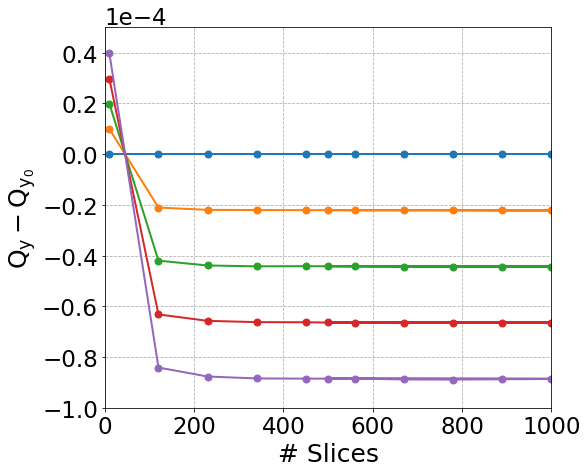

In [92]:
for intensity in intensity_list:
    plt.plot(slices_list, (np.array(Qy_dict_intensity[f'{intensity}'])-0.18), '-o', label=f'intensity = {intensity/1e10}e10')
plt.grid(ls='--')
#plt.xlim(1000, 20000)
plt.xlim(0, 1000)

#plt.legend()
plt.xlabel('# Slices')
plt.ylabel(r'$\mathrm{Q_y-Q_{y_0}}$')
plt.ylim(-10e-5, 5e-5)#3e-5
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#plt.legend(bbox_to_anchor=(1., 1.))
#plt.legend(bbox_to_anchor=(1., 1.))
plt.savefig('./output/Slices_scan_part1.png')